In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [6]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

  

title: yelp_review.csv, id: 1Pb-HyMgtDS7YLKy4fvHTmijQ8e5btxhf
title: assignment2_final.ipynb, id: 1bUcuXQXc7yxQJp3syyV1SKQrXhkyh5Pd
title: assignment2_final.ipynb, id: 1BzTVuxNs89te-CweYhAmmvAsoyJUVKyy
title: assignment2.ipynb, id: 1GgWimMgPEgfs5yK0wPE9ldZTOaDQIx7T
title: assignment2, id: 1GQ42YnoJY06wW6Boe6Md7hmX2mGcsCTv
title: TwitterAPIadnauseam.ipynb, id: 17CEE7esgukbxdksSofGcn0xtZLiCQL9z
title: Colab Notebooks, id: 1ifvtXVHfqG_RStAHTvCKFxq_EIVndFdI
title: Untitled0.ipynb, id: 1eao2LiZo6_CjDu8Fc7NRN4uXuFEX-tQK
title: Pics, id: 0B4Z5tSBhDSLqWnNGc2pCU3loakE
title: DSC_3425.JPG, id: 0B4Z5tSBhDSLqcTA2MWpkMVR4Zjg
title: mobile pics, id: 0B4Z5tSBhDSLqNmdYeWhUNGVmS3c
title: DSC_1395.jpg, id: 0B4Z5tSBhDSLqUHZ2cHRzdXZ2NE0
title: DSC_1393.jpg, id: 0B4Z5tSBhDSLqWnI3WXY2bTJiU3c
title: DSC_1392.jpg, id: 0B4Z5tSBhDSLqbkVzOExfQThMS1E
title: novofest, id: 0B4Z5tSBhDSLqflpZUy1XLWdNY3BsNlM3QkRyOHpMSHNGd0htb2NUb0gxTzhhVmJjZ29rN00


In [7]:
file2 = drive.CreateFile({'id': "1Pb-HyMgtDS7YLKy4fvHTmijQ8e5btxhf"})
print('title: %s, mimeType: %s' % (file2['title'], file2['mimeType']))

title: yelp_review.csv, mimeType: text/csv


In [0]:
file2.GetContentFile('yelp_review.csv') 

In [0]:
# Step 0: Receiving and reading the file.
import pandas as pd
xyz = pd.read_csv('yelp_review.csv', nrows=200000)

In [3]:

xyz.head()
xyz.shape



(200000, 9)

In [4]:
# taking relevant columns from the reviews
review = xyz[['text', 'stars']]
review.head()

,text,stars
0,Super simple place but amazing nonetheless. It...,5
1,Small unassuming place that changes their menu...,5
2,Lester's is located in a beautiful neighborhoo...,5
3,Love coming here. Yes the place always needs t...,4
4,Had their chocolate almond croissant and it wa...,4


In [5]:
# will help to check how many reviews are there per rating
review.stars.value_counts()

5    86501
4    46788
1    27375
3    22779
2    16557
Name: stars, dtype: int64

In [0]:
# The distributin of the rating shows that the classes or output are highly imbalanced, with more number of reviews towards 
#higher ratings. The pie plot below gives the details.

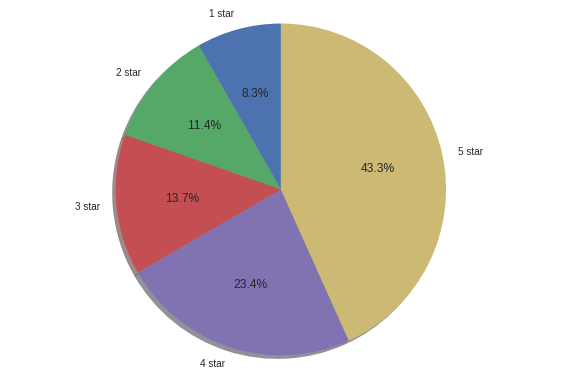

In [7]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['1 star', '2 star', '3 star', '4 star', "5 star"]
sizes = [16557, 22779, 27375, 46788, 86501] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [8]:
X = review["text"]
y = review.stars
X.shape
y.shape

(200000,)

In [0]:
#STEP 1/2: PREPROCESSING AND FEATURES EXTRACTION.
#STEMMING OF DOC USING NLTK

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])


In [0]:

# WILL USE TF-IDF VECTORIZER, WHICH IS COMBINATION OF COUNT VECTORIZER AND TF IDF TRANSFORMER
# preprocessing and feature extraction
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

#UNIGRAM
vectorizer_1 = StemmedTfidfVectorizer(stop_words='english')

In [0]:
X_train_dtm = vectorizer_1.fit_transform(X_train)
#dtm is data term matrix
#do fitting and transfrom in single step


In [12]:
tokens = vectorizer_1.get_feature_names()
print(len(tokens))
# number of features in unigram

81363


In [0]:
X_test_dtm = vectorizer_1.transform(X_test)

In [0]:
# REPEATING WITH BIGRAM METHOD
vectorizer_2 =  StemmedTfidfVectorizer(stop_words="english", ngram_range=(1,2))
X_train_dtm_2 = vectorizer_2.fit_transform(X_train)


In [15]:
tokens_2 = vectorizer_2.get_feature_names()
print(len(tokens_2))
#number of features in bigram

2849324


In [0]:
X_test_dtm_2 = vectorizer_2.transform(X_test)

In [17]:
print(tokens_2[20000:20059])

['20plus servic', '20pm', '20pm 50', '20pm actual', '20pm allow', '20pm arriv', '20pm avail', '20pm bar', '20pm bunch', '20pm check', '20pm drive', '20pm expect', '20pm friday', '20pm gave', '20pm got', '20pm group', '20pm happi', '20pm hostess', '20pm kitchen', '20pm ladi', '20pm order', '20pm purchas', '20pm salon', '20pm saturday', '20pm sight', '20pm spoke', '20pm thursday', '20pm wast', '20pm weekday', '20pp', '20pp breakfast', '20pp room', '20psi', '20psi car', '20rd', '20rd insp_id', '20road', '20road 20kil', '20s', '20s 10', '20s 12', '20s 30s', '20s 40s', '20s 55', '20s appoint', '20s bartend', '20s bleach', '20s budget', '20s came', '20s clear', '20s close', '20s ear', '20s entir', '20s expect', '20s experi', '20s felt', '20s fifti', '20s food', '20s heel']


In [18]:
#STEP 3: SUPERVISED LEARNING/ EVALUATION
# MULTINOMIAL NAIVE BAYES
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
nb1 = MultinomialNB()

nb1.fit(X_train_dtm, y_train)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
nb2 = MultinomialNB()
nb2.fit(X_train_dtm_2, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred_nb1 = nb1.predict(X_test_dtm)


In [0]:
y_pred_nb2 = nb2.predict(X_test_dtm_2)

In [22]:
from sklearn.metrics import f1_score
#F1 score for unigram NB
f1_score(y_test, y_pred_nb1, average= 'weighted')


0.43847600823977745

In [23]:
F1_nb = round(f1_score(y_test, y_pred_nb1, average= 'weighted'),5)
print(F1_nb)

0.43848


In [24]:
# F1 score for bigram NB
# to ignore warning due to classes with no predictions made

f1_score(y_test, y_pred_nb2, average= 'weighted')


0.28645948412433225

In [25]:
F2_nb = round(f1_score(y_test, y_pred_nb2, average= 'weighted'),5)
print(F2_nb)

0.28646


In [26]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(class_weight='balanced')
lr1.fit(X_train_dtm, y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:

y_pred_lr1 = lr1.predict(X_test_dtm)

In [28]:
lr2 = LogisticRegression(class_weight='balanced')
lr2.fit(X_train_dtm_2, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred_lr2 = lr2.predict(X_test_dtm_2)

In [30]:
# F1 score for unigram LR
f1_score(y_test, y_pred_lr1, average= 'weighted')

0.6380637428163922

In [31]:
F1_lr = round(f1_score(y_test, y_pred_lr1, average= 'weighted'),5)
print(F1_lr)

0.63806


In [32]:
# F1 score for bigram LR
f1_score(y_test, y_pred_lr2, average= 'weighted')

0.6486225428994348

In [33]:
F2_lr = round(f1_score(y_test, y_pred_lr2, average= 'weighted'),5)
print(F2_lr)

0.64862


In [0]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {'max_depth': [10, 20, 40, 50],
 'min_samples_leaf': [5,10,15],
 'min_samples_split': [5,10,15]}
clf = DecisionTreeClassifier(class_weight="balanced")


In [0]:
grid_obj1 = GridSearchCV(clf, param_grid, scoring="f1_weighted")

In [0]:
grid_fit1 = grid_obj1.fit(X_train_dtm, y_train)

In [0]:
grid_best_1 = grid_fit1.best_params_

In [36]:
print(grid_best_1)

{'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [0]:
grid_best_obj = grid_fit1.best_estimator_
# model classifier with best estimated parameters for unigram

In [0]:
y_pred_dt1 = grid_best_obj.predict(X_test_dtm)

In [39]:
# F1 score for unigram DT
f1_score(y_test, y_pred_dt1, average= 'weighted')

0.3018934127951089

In [84]:
F1_dt = round(f1_score(y_test, y_pred_dt1, average= 'weighted'),5)
print(F1_dt)

0.30189


In [0]:
grid_obj2 = GridSearchCV(clf, param_grid, scoring="f1_weighted")

In [0]:
grid_fit2 = grid_obj2.fit(X_train_dtm_2, y_train)

In [0]:
grid_best_2 = grid_fit2.best_params_

In [43]:

print(grid_best_2)

{'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [0]:
grid_best_obj2 = grid_fit2.best_estimator_
# model classifier with best estimated parameters for biigram

In [0]:
y_pred_dt2 = grid_best_obj2.predict(X_test_dtm_2)

In [46]:
# F1 score for biigram DT
f1_score(y_test, y_pred_dt2, average= 'weighted')

0.2731088994775998

In [85]:
F2_dt = round(f1_score(y_test, y_pred_dt2, average= 'weighted'),5)
print(F2_dt)

0.27311


In [0]:
# SUPPORT VECTOR MACHINES
from sklearn import svm
clf = svm.SVC(class_weight="balanced")
param_grid = {'C': [0.1,1,4,6,8,10,11,12], 
          'kernel': ['linear','rbf'],
         "gamma":[0.001, 0.01, 0.1, 1]}


grid_obj1 = GridSearchCV(clf, param_grid, scoring="f1_weighted")

In [0]:
grid_fit1 = grid_obj1.fit(X_train_dtm, y_train)

In [49]:
grid_fit1.best_params_

{'C': 4, 'gamma': 0.001, 'kernel': 'linear'}

In [0]:
grid_best_obj1 = grid_fit1.best_estimator_
# model classifier with best estimated parameters for unigram

In [0]:
y_pred_svm = grid_best_obj1.predict(X_test_dtm)

In [52]:
# F1 score for unigram SVM
f1_score(y_test, y_pred_svm, average= 'weighted')

0.41382111590021203

In [86]:
F1_svm = round(f1_score(y_test, y_pred_svm, average= 'weighted'),5)
print(F1_svm)

0.41382


In [0]:
grid_fit2 = grid_obj1.fit(X_train_dtm_2, y_train)

In [54]:
grid_fit2.best_params_

{'C': 4, 'gamma': 0.001, 'kernel': 'linear'}

In [0]:
grid_best_obj2 = grid_fit2.best_estimator_
# model classifier with best estimated parameters for biigram

In [0]:
y_pred_svm2 = grid_best_obj2.predict(X_test_dtm_2)

In [57]:
# F1 score for biigram SVM
f1_score(y_test, y_pred_svm2, average= 'weighted')

0.3996828264669445

In [88]:
F2_svm = round(f1_score(y_test, y_pred_svm2, average= 'weighted'),5)
print(F2_svm)

0.39968


In [0]:
# RANDOM FOREST CLASSIFICATION
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [10, 20, 40, 50, 60,None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 50, 100, 200]}
clf = RandomForestClassifier(class_weight="balanced")

grid_obj1 = GridSearchCV(clf, param_grid, scoring="f1_weighted")

In [0]:
grid_fit1 = grid_obj1.fit(X_train_dtm, y_train)

In [0]:
grid_best_1 = grid_fit1.best_params_

In [61]:
print(grid_best_1)

{'max_depth': 60, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [0]:
grid_best_obj1 = grid_fit1.best_estimator_

In [0]:
y_pred_rf = grid_best_obj1.predict(X_test_dtm)

In [64]:
# F1 score for unigram RF
f1_score(y_test, y_pred_rf, average= 'weighted')

0.4104230864616098

In [89]:
F1_rf = round(f1_score(y_test, y_pred_rf, average= 'weighted'),5)
print(F1_rf)

0.41042


In [0]:
grid_fit2 = grid_obj1.fit(X_train_dtm_2, y_train)

In [0]:
grid_best_2 = grid_fit2.best_params_

In [67]:
print(grid_best_2)

{'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [0]:
grid_best_obj2 = grid_fit2.best_estimator_

In [0]:
y_pred_rf2 = grid_best_obj2.predict(X_test_dtm_2)

In [70]:
# F1 score for bigram RF
f1_score(y_test, y_pred_rf2, average= 'weighted')

0.4281300564773036

In [90]:
F2_rf = round(f1_score(y_test, y_pred_rf2, average= 'weighted'),5)
print(F2_rf)

0.42813


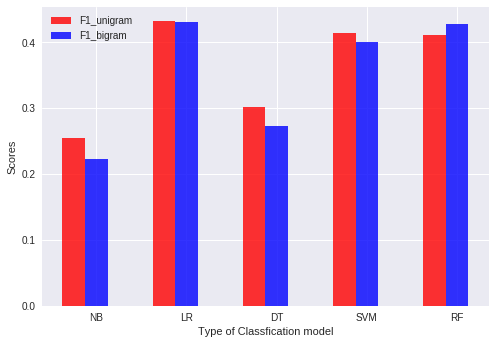

In [93]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 5
F1_Score_unigram = (F1_nb, F1_lr, F1_dt, F1_svm, F1_rf)
F1_Score_bigram = (F2_nb, F2_lr, F2_dt, F2_svm, F2_rf)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, F1_Score_unigram, bar_width,
                 alpha=opacity,
                 color='r',
                 label='F1_unigram')
 
rects2 = plt.bar(index + bar_width, F1_Score_bigram, bar_width,
                 alpha=opacity,
                 color='b',
                 label='F1_bigram')
 
plt.xlabel('Type of Classfication model')
plt.ylabel('Scores')
plt.title('')
plt.xticks(index + bar_width, ('NB', 'LR', 'DT', 'SVM', "RF"))
plt.legend()